In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\hr_data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(1470, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee_id                1470 non-null   int64 
 1   Age                        1470 non-null   int64 
 2   Gender                     1470 non-null   object
 3   Department                 1470 non-null   object
 4   Job_role                   1470 non-null   object
 5   Education                  1470 non-null   int64 
 6   Education_field            1470 non-null   object
 7   Marital_status             1470 non-null   object
 8   Attrition                  1470 non-null   object
 9   Years_at_company           1470 non-null   int64 
 10  Business_travel            1470 non-null   object
 11  Daily_pay                  1470 non-null   int64 
 12  Distance_from_home         1470 non-null   int64 
 13  Environment_satisfaction   1470 non-null   int64 
 14  Hourly_r

In [5]:
df.isnull().sum()

Employee_id                  0
Age                          0
Gender                       0
Department                   0
Job_role                     0
Education                    0
Education_field              0
Marital_status               0
Attrition                    0
Years_at_company             0
Business_travel              0
Daily_pay                    0
Distance_from_home           0
Environment_satisfaction     0
Hourly_rate                  0
Job_involvement              0
Job_level                    0
Job_satisfaction             0
Monthly_income               0
Monthly_rate                 0
Num_companies_worked         0
Over_time                    0
Percent_Salary_Hike          0
Performance_Rating           0
Relationship_Satisfaction    0
Standard_Hours               0
Stock_Option_Level           0
Total_Working_Years          0
Training_Times_LastYear      0
WorkLife_Balance             0
Years_In_CurrentRole         0
Years_Since_LastPromotion    0
Years_Wi

In [6]:
total_employees = df['Employee_id'].nunique()
print("Total Employees:", total_employees)


Total Employees: 1470


In [7]:
total_attrition = df[df['Attrition'] == 'Yes'].shape[0]
print("Total Attrition:", total_attrition)


Total Attrition: 237


In [8]:
# 1. Group by NumCompaniesWorked & Gender
attrition_comp_gender = (
    df[df['Attrition'] == 'Yes']   # only attrition cases
      .groupby(['Num_companies_worked', 'Gender'])
      .size()
      .reset_index(name='Attrition_Count')
)

# 2. Also calculate % attrition within each Number of Companies group
total_by_group = df.groupby('Num_companies_worked').size().reset_index(name='Total_Count')

# 3. Merge both tables
attrition_comp_gender = attrition_comp_gender.merge(total_by_group, on='Num_companies_worked')

# 4. Add percentage column
attrition_comp_gender['Attrition_Percentage'] = (
    attrition_comp_gender['Attrition_Count'] / attrition_comp_gender['Total_Count'] * 100
).round(2)

attrition_comp_gender


,Num_companies_worked,Gender,Attrition_Count,Total_Count,Attrition_Percentage
0,0,Female,11,197,5.58
1,0,Male,12,197,6.09
2,1,Female,41,521,7.87
3,1,Male,57,521,10.94
4,2,Female,5,146,3.42
5,2,Male,11,146,7.53
6,3,Female,4,159,2.52
7,3,Male,12,159,7.55
8,4,Female,6,139,4.32
9,4,Male,11,139,7.91


In [10]:
attrition_rate_gender = df[df['Attrition'] == 'Yes']['Gender'].value_counts() / df['Gender'].value_counts() * 100
print(attrition_rate_gender)


Gender
Male      17.006803
Female    14.795918
Name: count, dtype: float64


In [11]:
attrition_by_gender = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
print(attrition_by_gender)


Gender
Male      150
Female     87
Name: count, dtype: int64


In [12]:
attrition_gender_dept = df[df['Attrition'] == 'Yes'].groupby(['Gender', 'Department']).size().reset_index(name='Attrition Count')
attrition_gender_dept


,Gender,Department,Attrition Count
0,Female,Human Resources,6
1,Female,Research & Development,43
2,Female,Sales,38
3,Male,Human Resources,6
4,Male,Research & Development,90
5,Male,Sales,54


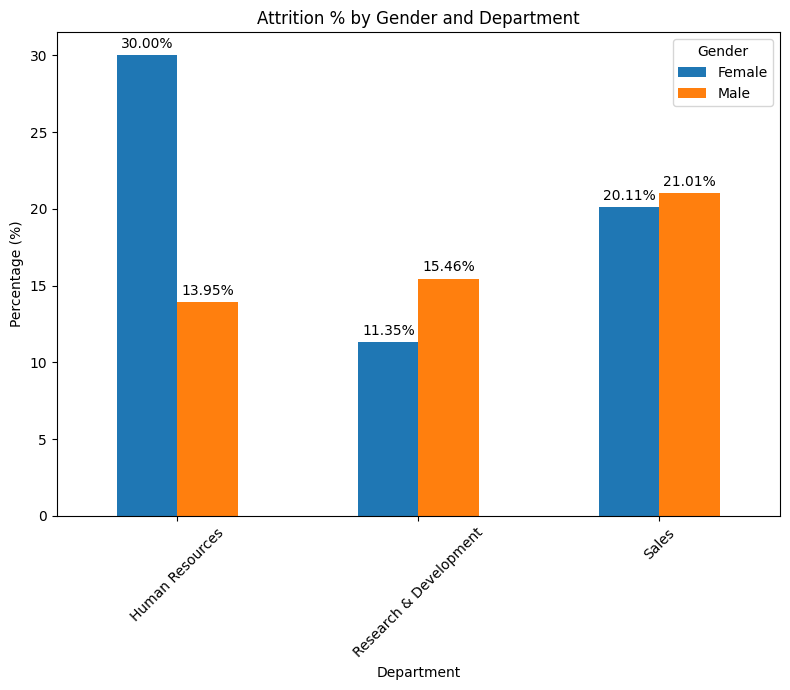

In [13]:

attr = df[df['Attrition'] == 'Yes']

# Count total employees per dept + gender
total_counts = df.groupby(['Department', 'Gender']).size()

# Count attrition per dept + gender
attrition_counts = attr.groupby(['Department', 'Gender']).size()
attrition_percent = (attrition_counts / total_counts * 100).unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(8,7))
attrition_percent.plot(kind='bar', ax=ax)

plt.title("Attrition % by Gender and Department")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

plt.tight_layout()
plt.show()


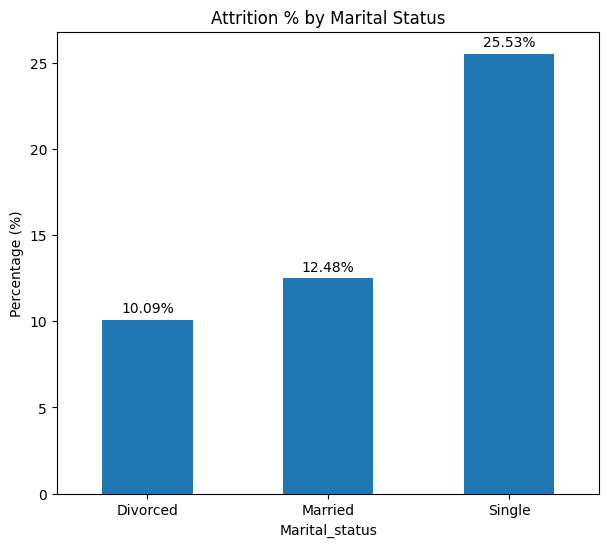

In [14]:

attr = df[df['Attrition'] == 'Yes']

# 2. Total employees per marital status
total_counts = df['Marital_status'].value_counts()

# 3. Employees who left per marital status
attr_counts = attr['Marital_status'].value_counts()

attr_percent = (attr_counts / total_counts * 100).round(2)


fig, ax = plt.subplots(figsize=(7,6))
attr_percent.plot(kind='bar', ax=ax)

plt.title("Attrition % by Marital Status")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

plt.show()


In [15]:
# Create income bins
bins = [0, 3000, 6000, df['Monthly_income'].max()]
labels = ['Low Income', 'Medium Income', 'High Income']

df['Income_Group'] = pd.cut(df['Monthly_income'], bins=bins, labels=labels)


In [16]:
attr = df[df['Attrition'] == 'Yes']  # only resigned people

total_counts = df['Income_Group'].value_counts()
attr_counts = attr['Income_Group'].value_counts()

attr_percent_income = (attr_counts / total_counts * 100).round(2)
attr_percent_income


Income_Group
Low Income       28.61
Medium Income    12.72
High Income      10.43
Name: count, dtype: float64

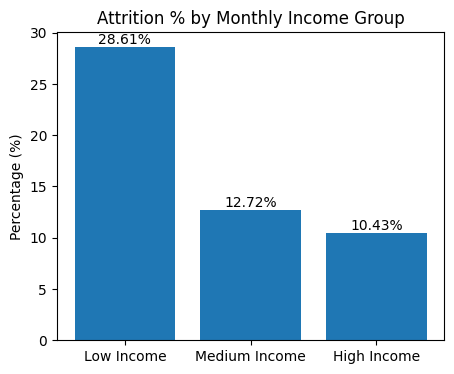

In [17]:


plt.figure(figsize=(5,4))
bars = plt.bar(attr_percent_income.index, attr_percent_income.values)

plt.title("Attrition % by Monthly Income Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height}%', ha='center', va='bottom')

plt.show()


In [18]:
bins_rate = [0, 5000, 15000, 25000]
labels_rate = ['Low Rate', 'Mid Rate', 'High Rate']

df['Rate_Group'] = pd.cut(df['Monthly_rate'], bins=bins_rate, labels=labels_rate)


In [19]:
attrition_gender_rate = df.groupby(
    ['Rate_Group', 'Gender'], 
    observed=True
).agg(
    Total_Employees=('Employee_id', 'count'),
    Attrition_Count=('Attrition', lambda x: (x == 'Yes').sum())
)


In [20]:
attrition_rate = df.groupby("Rate_Group", observed=True).agg(
    Total_Employees=("Employee_id", "count"),
    Attrition_Count=("Attrition", lambda x: (x == "Yes").sum())
)

attrition_rate["Attrition_Percentage"] = (
    attrition_rate["Attrition_Count"] / attrition_rate["Total_Employees"] * 100
)

print(attrition_rate)


            Total_Employees  Attrition_Count  Attrition_Percentage
Rate_Group                                                        
Low Rate                171               30             17.543860
Mid Rate                603               95             15.754561
High Rate               600               92             15.333333


In [21]:
attrition_gender_rate = df.groupby(
    ["Rate_Group", "Gender"], 
    observed=True
).agg(
    Total_Employees=("Employee_id", "count"),
    Attrition_Count=("Attrition", lambda x: (x == "Yes").sum())
)

attrition_gender_rate["Attrition_Percentage"] = (
    attrition_gender_rate["Attrition_Count"] 
    / attrition_gender_rate["Total_Employees"] * 100
)

print(attrition_gender_rate)


                   Total_Employees  Attrition_Count  Attrition_Percentage
Rate_Group Gender                                                        
Low Rate   Female               60                9             15.000000
           Male                111               21             18.918919
Mid Rate   Female              237               34             14.345992
           Male                366               61             16.666667
High Rate  Female              252               37             14.682540
           Male                348               55             15.804598


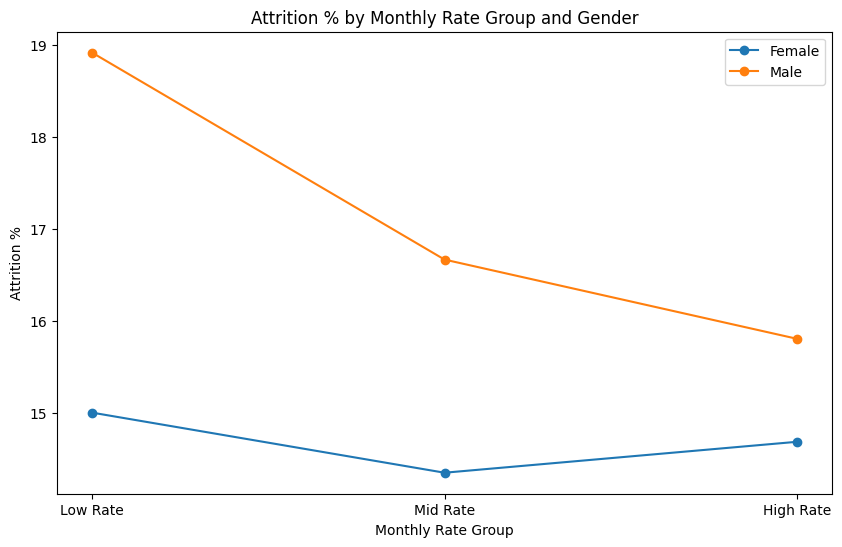

In [22]:
attrition_gender_rate.reset_index(inplace=True)

plt.figure(figsize=(10,6))
for gender in attrition_gender_rate["Gender"].unique():
    data = attrition_gender_rate[attrition_gender_rate["Gender"] == gender]
    plt.plot(data["Rate_Group"], data["Attrition_Percentage"], marker="o", label=gender)

plt.title("Attrition % by Monthly Rate Group and Gender")
plt.ylabel("Attrition %")
plt.xlabel("Monthly Rate Group")
plt.legend()
plt.show()


In [23]:
attrition_js = df.groupby("Job_satisfaction").agg(
    Total_Employees=("Employee_id", "count"),
    Attrition_Count=("Attrition", lambda x: (x == "Yes").sum())
)

attrition_js["Attrition_Percentage"] = (
    attrition_js["Attrition_Count"] / attrition_js["Total_Employees"] * 100
)

print(attrition_js)


                  Total_Employees  Attrition_Count  Attrition_Percentage
Job_satisfaction                                                        
1                             289               66             22.837370
2                             280               46             16.428571
3                             442               73             16.515837
4                             459               52             11.328976


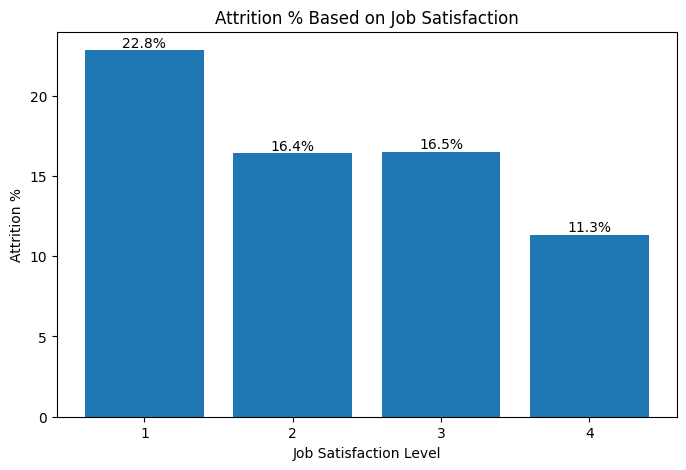

In [24]:


plt.figure(figsize=(8,5))
bars = plt.bar(
    attrition_js.index.astype(str),
    attrition_js["Attrition_Percentage"]
)

plt.title("Attrition % Based on Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Attrition %")

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",      # show value like 12.3%
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


In [25]:
bins = [10, 15, 20, 30]
labels = ['Low', 'Medium', 'High']

df['Hike_Group'] = pd.cut(df['Percent_Salary_Hike'], bins=bins, labels=labels)


In [26]:
attrition_hike_gender = df.groupby(
    ['Hike_Group', 'Gender'], observed=True
).agg(
    Total_Employees=('Employee_id', 'count'),
    Attrition_Count=('Attrition', lambda x: (x == 'Yes').sum())
).reset_index()


In [27]:
attrition_hike_gender['Attrition_Percentage'] = (
    attrition_hike_gender['Attrition_Count'] /
    attrition_hike_gender['Total_Employees'] * 100
).round(2)


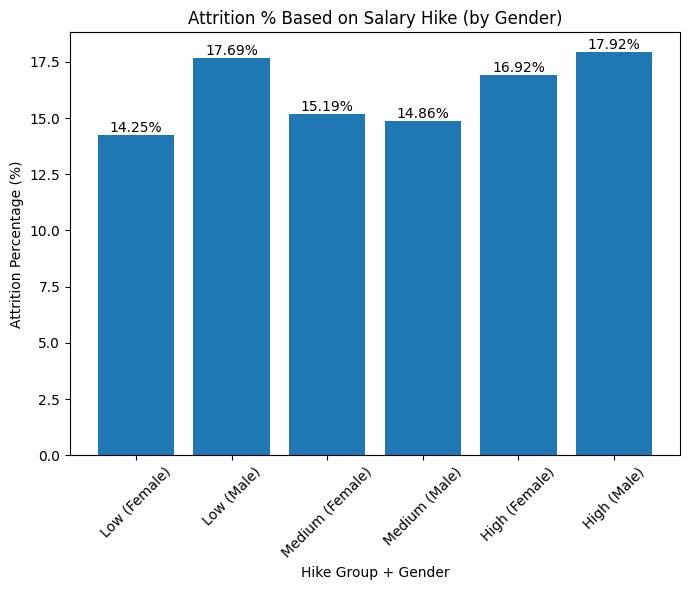

In [29]:
plt.figure(figsize=(7,6))

# Convert categorical to string
x_labels = (
    attrition_hike_gender['Hike_Group'].astype(str)
    + " (" 
    + attrition_hike_gender['Gender'].astype(str) 
    + ")"
)

bars = plt.bar(
    x_labels,
    attrition_hike_gender['Attrition_Percentage']
)

plt.title("Attrition % Based on Salary Hike (by Gender)")
plt.ylabel("Attrition Percentage (%)")
plt.xlabel("Hike Group + Gender")

# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height}%",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
# Filter only employees who left
left = df[df['Attrition'] == 'Yes']

# Calculate average years at company by gender
avg_years_left = left.groupby('Gender')['Years_at_company'].mean().reset_index()
avg_years_left


,Gender,Years_at_company
0,Female,5.919540
1,Male,4.673333


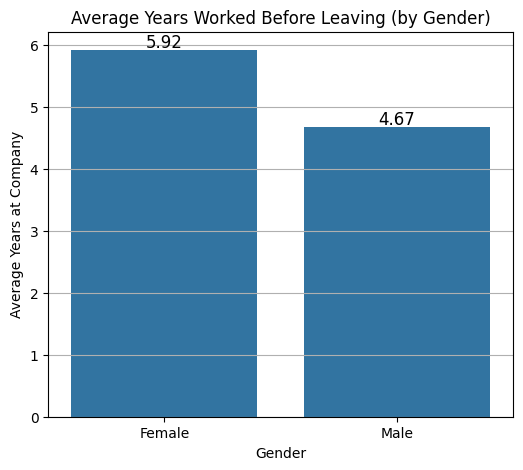

In [36]:


left = df[df['Attrition'] == 'Yes']

avg_years_left = left.groupby('Gender')['Years_at_company'].mean().reset_index()

plt.figure(figsize=(6,5))
ax = sns.barplot(data=avg_years_left, x='Gender', y='Years_at_company')

# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.05,
        round(height, 2),
        ha='center',
        fontsize=12
    )

plt.title("Average Years Worked Before Leaving (by Gender)")
plt.xlabel("Gender")
plt.ylabel("Average Years at Company")
plt.grid(axis='y')

plt.show()


CONCLUSION :

The HR Attrition Analysis provides valuable insights into the factors influencing employee turnover. Out of 1470 total employees, 237 employees left the company, resulting in an overall attrition rate of 16.1%. The analysis reveals that:

Male employees (150) leave more frequently than female employees (87).

The Research & Development department has the highest attrition for both genders.

Single employees show the highest likelihood of leaving, followed by married and divorced employees.

Employees with lower monthly income are more likely to leave, highlighting income as a strong driver of attrition.

Individuals who left typically worked an average of 4.69 years (male) and 5.92 years (female) before resigning.

Employees who received a salary hike between 11–14% represent the largest portion of attrition cases.

Overall, the findings suggest that attrition is influenced by a combination of income, early-career tenure, marital status, and department-specific pressures, especially in R&D. These insights can help HR teams focus on competitive compensation, employee engagement, and targeted retention strategies.